import libraries

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

$\textbf{DUBLIN AIRPORT}$

read data

In [2]:
#Dublin Airport (East):
dswind = pd.read_csv('hly532/hly532.csv',skiprows=24,usecols=[0,11,12,13,14], header=None, skipinitialspace=True, names = ["date","speed_ind","speed","dir_ind","direction"], index_col =0, parse_dates=True)


dswind

,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,23,2,210.0
1992-01-01 01:00:00,2,23,2,220.0
1992-01-01 02:00:00,2,22,2,220.0
1992-01-01 03:00:00,2,22,2,220.0
1992-01-01 04:00:00,2,23,2,230.0
...,...,...,...,...
2022-01-31 20:00:00,2,10,2,250.0
2022-01-31 21:00:00,2,12,2,250.0
2022-01-31 22:00:00,2,12,2,260.0


filter data and convert speeds to knots

In [3]:
dswind = dswind[(dswind.speed_ind==2)&(dswind.dir_ind==2)&(dswind.speed!=0)&(dswind.index.year>1991)&(dswind.index.year<2022)]
dswind.speed = dswind.speed*(0.514)
dswind

C:\Users\ndoyl\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,11.822,2,210.0
1992-01-01 01:00:00,2,11.822,2,220.0
1992-01-01 02:00:00,2,11.308,2,220.0
1992-01-01 03:00:00,2,11.308,2,220.0
1992-01-01 04:00:00,2,11.822,2,230.0
...,...,...,...,...
2021-12-31 19:00:00,2,4.626,2,200.0
2021-12-31 20:00:00,2,5.140,2,190.0
2021-12-31 21:00:00,2,3.084,2,100.0


Defining angle sections and size

In [4]:
angles = np.arange(10,370,10)
n = np.shape(dswind)[0]
no_angles = len(angles)

extracting wind speed categories

In [5]:
C1 = dswind[dswind.speed <= 2].groupby('direction').count()/n
C2 = dswind[(dswind.speed > 2)&(dswind.speed <= 5)].groupby('direction').count()/n
C3 = dswind[(dswind.speed > 5)&(dswind.speed <= 10)].groupby('direction').count()/n
C4 = dswind[dswind.speed > 10].groupby('direction').count()/n

and frequencies

In [6]:
F1 = np.zeros((no_angles))
F2 = np.zeros((no_angles))
F3 = np.zeros((no_angles))
F4 = np.zeros((no_angles))

for i in range(no_angles):
    j = (i+1)*10
    F1[i] = C1.speed[j]
    F2[i] = C2.speed[j]
    F3[i] = C3.speed[j]
    F4[i] = C4.speed[j]

plotting

Text(0.5, 1.05, 'Windrose (Dublin Airport)')

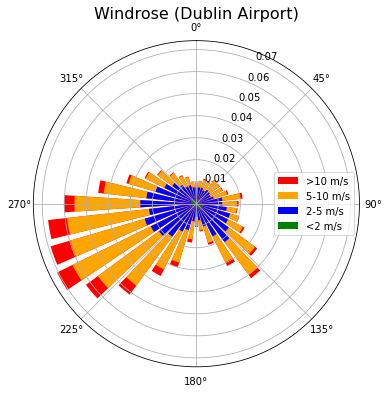

In [7]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.bar(np.radians(angles),F1+F2+F3+F4,width=0.13,color='r',label='>10 m/s')
ax.bar(np.radians(angles),F1+F2+F3,width=0.13,color='orange',label='5-10 m/s')
ax.bar(np.radians(angles),F1+F2,width=0.13,color='b',label='2-5 m/s')
ax.bar(np.radians(angles),F1,width=0.13,color='g',label='<2 m/s')
plt.legend(loc='right')
plt.title('Windrose (Dublin Airport)',fontsize=16)

Extracting quantiles

In [8]:
MM=10
T10 = np.zeros((24))
T25 = np.zeros((24))
T50 = np.zeros((24))
T75 = np.zeros((24))
T90 = np.zeros((24))
T99 = np.zeros((24))
dates = np.zeros((24))
Oct16 = np.zeros((24))

for HH in range(24):
    T10[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.1)
    T25[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.25)
    T50[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.5)
    T75[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.75)
    T90[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.9)
    T99[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.99)
    Oct16[HH] = dswind[(dswind.index.month==MM)&(dswind.index.year==2017)&(dswind.index.day==16)&(dswind.index.hour==HH)].speed

plotting

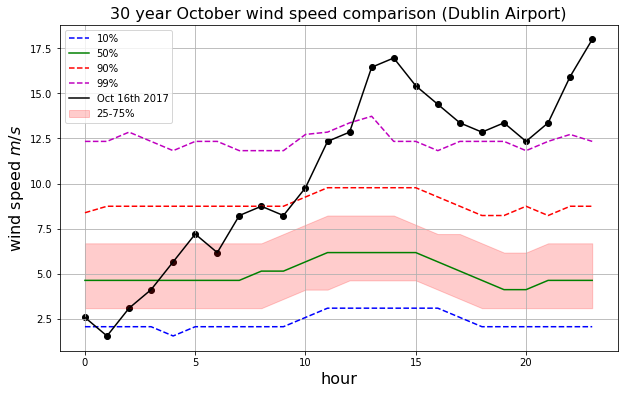

In [9]:
fig = plt.figure(figsize=[10,6])
plt.plot(T10,'b',linestyle='dashed',label='10%')
plt.plot(T50,'g',label='50%')
plt.plot(T90,'r',linestyle='dashed',label='90%')
plt.plot(T99,'m',linestyle='dashed',label='99%')
plt.plot(Oct16,'k',label='Oct 16th 2017')
plt.scatter(range(24),Oct16,color='k')
plt.fill_between(range(24),T25,T75,alpha=0.2,color='red',label='25-75%')
plt.xlabel('hour',fontsize=16)
plt.ylabel('wind speed $m/s$',fontsize=16)
plt.title('30 year October wind speed comparison (Dublin Airport)',fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)

analysing 30 year data

In [10]:
Octobers = dswind[(dswind.index.month==MM)]
Nmean = len(Octobers)
Octobermaxs = Octobers.groupby([Octobers.index.year,Octobers.index.day]).max()
Octobermins = Octobers.groupby([Octobers.index.year,Octobers.index.day]).min()
Nextr = len(Octobermaxs)

In [11]:
mu_30 = dswind.speed.mean()
sigma_30 = dswind.speed.std()
N_30 = len(dswind)
print('Dublin Airport October daily mean avg:', Octobers.speed.mean())
print('Dublin Airport October daily mean std:', Octobers.speed.std())
print('\n')
print('Dublin Airport October daily max avg:', Octobermaxs.speed.mean())
print('Dublin Airport October daily max std:', Octobermaxs.speed.std())
print('\n')
print('Dublin Airport October daily min avg:', Octobermins.speed.mean())
print('Dublin Airport October daily min std:', Octobermins.speed.std())

Dublin Airport October daily mean avg: 5.3886850903209185
Dublin Airport October daily mean std: 2.67444424203147


Dublin Airport October daily max avg: 8.10572473118281
Dublin Airport October daily max std: 2.853160258982145


Dublin Airport October daily min avg: 2.7440967741935354
Dublin Airport October daily min std: 1.7273913691417833


analysing October 16th data

In [12]:
Ophelia = dswind[(dswind.index.year==2017)&(dswind.index.month==10)&(dswind.index.day==16)]
Ophelia

,speed_ind,speed,dir_ind,direction
date,,,,
2017-10-16 00:00:00,2,2.570,2,10.0
2017-10-16 01:00:00,2,1.542,2,20.0
2017-10-16 02:00:00,2,3.084,2,140.0
2017-10-16 03:00:00,2,4.112,2,110.0
2017-10-16 04:00:00,2,5.654,2,110.0
2017-10-16 05:00:00,2,7.196,2,110.0
2017-10-16 06:00:00,2,6.168,2,110.0
2017-10-16 07:00:00,2,8.224,2,90.0
2017-10-16 08:00:00,2,8.738,2,100.0


In [13]:
print('Ophelia mean:', Ophelia.speed.mean())
print('Ophelia max:', Ophelia.speed.max())
print('Ophelia min:', Ophelia.speed.min())

Ophelia mean: 10.537
Ophelia max: 17.990000000000002
Ophelia min: 1.542


In [14]:
print('Mean_z = ', (Ophelia.speed.mean()-Octobers.speed.mean())/Octobers.speed.std())
print('Max_z = ', (Ophelia.speed.max()-Octobermaxs.speed.mean())/Octobermaxs.speed.std())
print('Min_z = ', (Ophelia.speed.min()-Octobermins.speed.mean())/Octobermins.speed.std())

Mean_z =  1.9250036432872109
Max_z =  3.4643252995341287
Min_z =  -0.6959029642429966


$\textbf{CORK AIRPORT}$

read data

In [15]:

#Cork Airport (South):
dswind = pd.read_csv('hly3904/hly3904.csv',skiprows=24,usecols=[0,11,12,13,14], header=None, skipinitialspace=True, names = ["date","speed_ind","speed","dir_ind","direction"], index_col =0, parse_dates=True)


dswind

,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,13,2,220
1992-01-01 01:00:00,2,22,2,220
1992-01-01 02:00:00,2,24,2,230
1992-01-01 03:00:00,2,18,2,240
1992-01-01 04:00:00,2,20,2,250
...,...,...,...,...
2022-02-28 20:00:00,2,9,2,340
2022-02-28 21:00:00,2,8,2,340
2022-02-28 22:00:00,2,9,2,340


filter data and convert speeds to knots

In [16]:
dswind = dswind[(dswind.speed_ind==2)&(dswind.dir_ind==2)&(dswind.speed!=0)&(dswind.index.year>1991)&(dswind.index.year<2022)]
dswind.speed = dswind.speed*(0.514)
dswind

C:\Users\ndoyl\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,6.682,2,220
1992-01-01 01:00:00,2,11.308,2,220
1992-01-01 02:00:00,2,12.336,2,230
1992-01-01 03:00:00,2,9.252,2,240
1992-01-01 04:00:00,2,10.280,2,250
...,...,...,...,...
2021-12-31 19:00:00,2,7.710,2,150
2021-12-31 20:00:00,2,7.710,2,160
2021-12-31 21:00:00,2,7.710,2,170


Defining angle sections and size

In [17]:
angles = np.arange(10,370,10)
n = np.shape(dswind)[0]
no_angles = len(angles)

extracting wind speed categories

In [18]:
C1 = dswind[dswind.speed <= 2].groupby('direction').count()/n
C2 = dswind[(dswind.speed > 2)&(dswind.speed <= 5)].groupby('direction').count()/n
C3 = dswind[(dswind.speed > 5)&(dswind.speed <= 10)].groupby('direction').count()/n
C4 = dswind[dswind.speed > 10].groupby('direction').count()/n

and frequencies

In [19]:
F1 = np.zeros((no_angles))
F2 = np.zeros((no_angles))
F3 = np.zeros((no_angles))
F4 = np.zeros((no_angles))

for i in range(no_angles):
    j = (i+1)*10
    F1[i] = C1.speed[j]
    F2[i] = C2.speed[j]
    F3[i] = C3.speed[j]
    F4[i] = C4.speed[j]

plotting

Text(0.5, 1.05, 'Windrose (Cork Airport)')

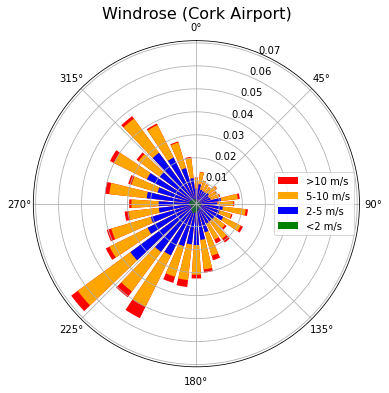

In [20]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.bar(np.radians(angles),F1+F2+F3+F4,width=0.13,color='r',label='>10 m/s')
ax.bar(np.radians(angles),F1+F2+F3,width=0.13,color='orange',label='5-10 m/s')
ax.bar(np.radians(angles),F1+F2,width=0.13,color='b',label='2-5 m/s')
ax.bar(np.radians(angles),F1,width=0.13,color='g',label='<2 m/s')
plt.legend(loc='right')
plt.title('Windrose (Cork Airport)',fontsize=16)

Extracting quantiles

In [21]:
MM=10
T10 = np.zeros((24))
T25 = np.zeros((24))
T50 = np.zeros((24))
T75 = np.zeros((24))
T90 = np.zeros((24))
T99 = np.zeros((24))
dates = np.zeros((24))
Oct16 = np.zeros((24))

for HH in range(24):
    T10[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.1)
    T25[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.25)
    T50[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.5)
    T75[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.75)
    T90[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.9)
    T99[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.99)
    Oct16[HH] = dswind[(dswind.index.month==MM)&(dswind.index.year==2017)&(dswind.index.day==16)&(dswind.index.hour==HH)].speed

plotting

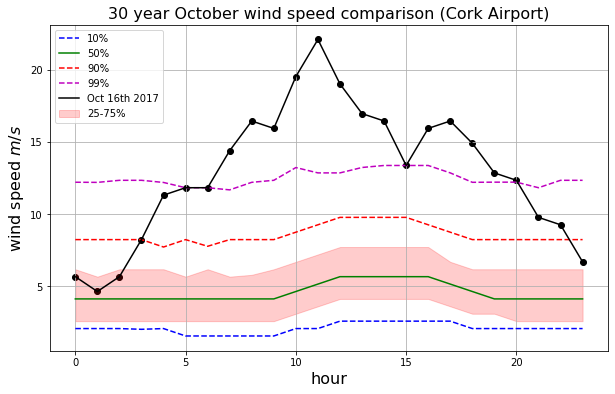

In [22]:
fig = plt.figure(figsize=[10,6])
plt.plot(T10,'b',linestyle='dashed',label='10%')
plt.plot(T50,'g',label='50%')
plt.plot(T90,'r',linestyle='dashed',label='90%')
plt.plot(T99,'m',linestyle='dashed',label='99%')
plt.plot(Oct16,'k',label='Oct 16th 2017')
plt.scatter(range(24),Oct16,color='k')
plt.fill_between(range(24),T25,T75,alpha=0.2,color='red',label='25-75%')
plt.xlabel('hour',fontsize=16)
plt.ylabel('wind speed $m/s$',fontsize=16)
plt.title('30 year October wind speed comparison (Cork Airport)',fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)

analysing 30 year data

In [23]:
Octobers = dswind[(dswind.index.month==MM)]
Nmean = len(Octobers)
Octobermaxs = Octobers.groupby([Octobers.index.year,Octobers.index.day]).max()
Octobermins = Octobers.groupby([Octobers.index.year,Octobers.index.day]).min()
Nextr = len(Octobermaxs)

In [24]:
mu_30 = dswind.speed.mean()
sigma_30 = dswind.speed.std()
N_30 = len(dswind)
print('Cork Airport October daily mean avg:', Octobers.speed.mean())
print('Cork Airport October daily mean std:', Octobers.speed.std())
print('\n')
print('Cork Airport October daily max avg:', Octobermaxs.speed.mean())
print('Cork Airport October daily max std:', Octobermaxs.speed.std())
print('\n')
print('Cork Airport October daily min avg:', Octobermins.speed.mean())
print('Cork Airport October daily min std:', Octobermins.speed.std())

Cork Airport October daily mean avg: 4.9908136216799175
Cork Airport October daily mean std: 2.6693315023165733


Cork Airport October daily max avg: 7.782402150537642
Cork Airport October daily max std: 2.9220893813558546


Cork Airport October daily min avg: 2.4213268817204217
Cork Airport October daily min std: 1.5630828081219017


analysing October 16th data

In [25]:
Ophelia = dswind[(dswind.index.year==2017)&(dswind.index.month==10)&(dswind.index.day==16)]
Ophelia

,speed_ind,speed,dir_ind,direction
date,,,,
2017-10-16 00:00:00,2,5.654,2,140
2017-10-16 01:00:00,2,4.626,2,90
2017-10-16 02:00:00,2,5.654,2,90
2017-10-16 03:00:00,2,8.224,2,100
2017-10-16 04:00:00,2,11.308,2,80
2017-10-16 05:00:00,2,11.822,2,100
2017-10-16 06:00:00,2,11.822,2,100
2017-10-16 07:00:00,2,14.392,2,150
2017-10-16 08:00:00,2,16.448,2,160


In [26]:
print('Ophelia mean:', Ophelia.speed.mean())
print('Ophelia max:', Ophelia.speed.max())
print('Ophelia min:', Ophelia.speed.min())

Ophelia mean: 12.978500000000004
Ophelia max: 22.102
Ophelia min: 4.626


In [27]:
print('Mean_z = ', (Ophelia.speed.mean()-Octobers.speed.mean())/Octobers.speed.std())
print('Max_z = ', (Ophelia.speed.max()-Octobermaxs.speed.mean())/Octobermaxs.speed.std())
print('Min_z = ', (Ophelia.speed.min()-Octobermins.speed.mean())/Octobermins.speed.std())

Mean_z =  2.9923920544855482
Max_z =  4.900465379610681
Min_z =  1.4104646963193013


$\textbf{SHANNON AIRPORT}$

read data

In [28]:

#Shannon Airport (Midwest):
dswind = pd.read_csv('hly518/hly518.csv',skiprows=24,usecols=[0,11,12,13,14], header=None, skipinitialspace=True, names = ["date","speed_ind","speed","dir_ind","direction"], index_col =0, parse_dates=True)


dswind

,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,20.0,2,230.0
1992-01-01 01:00:00,2,19.0,2,230.0
1992-01-01 02:00:00,2,17.0,2,230.0
1992-01-01 03:00:00,2,18.0,2,230.0
1992-01-01 04:00:00,2,18.0,2,230.0
...,...,...,...,...
2022-02-28 20:00:00,2,1.0,2,290.0
2022-02-28 21:00:00,2,3.0,2,300.0
2022-02-28 22:00:00,2,2.0,2,320.0


filter data and convert speeds to knots

In [29]:
dswind = dswind[(dswind.speed_ind==2)&(dswind.dir_ind==2)&(dswind.speed!=0)&(dswind.index.year>1991)&(dswind.index.year<2022)]
dswind.speed = dswind.speed*(0.514)
dswind

C:\Users\ndoyl\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,10.280,2,230.0
1992-01-01 01:00:00,2,9.766,2,230.0
1992-01-01 02:00:00,2,8.738,2,230.0
1992-01-01 03:00:00,2,9.252,2,230.0
1992-01-01 04:00:00,2,9.252,2,230.0
...,...,...,...,...
2021-12-31 19:00:00,2,7.710,2,160.0
2021-12-31 20:00:00,2,7.710,2,140.0
2021-12-31 21:00:00,2,10.280,2,160.0


Defining angle sections and size

In [30]:
angles = np.arange(10,370,10)
n = np.shape(dswind)[0]
no_angles = len(angles)

extracting wind speed categories

In [31]:
C1 = dswind[dswind.speed <= 2].groupby('direction').count()/n
C2 = dswind[(dswind.speed > 2)&(dswind.speed <= 5)].groupby('direction').count()/n
C3 = dswind[(dswind.speed > 5)&(dswind.speed <= 10)].groupby('direction').count()/n
C4 = dswind[dswind.speed > 10].groupby('direction').count()/n

and frequencies

In [32]:
F1 = np.zeros((no_angles))
F2 = np.zeros((no_angles))
F3 = np.zeros((no_angles))
F4 = np.zeros((no_angles))

for i in range(no_angles):
    j = (i+1)*10
    F1[i] = C1.speed[j]
    F2[i] = C2.speed[j]
    F3[i] = C3.speed[j]
    F4[i] = C4.speed[j]

plotting

Text(0.5, 1.05, 'Windrose (Shannon Airport)')

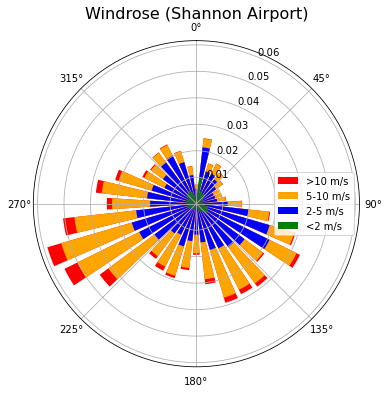

In [33]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.bar(np.radians(angles),F1+F2+F3+F4,width=0.13,color='r',label='>10 m/s')
ax.bar(np.radians(angles),F1+F2+F3,width=0.13,color='orange',label='5-10 m/s')
ax.bar(np.radians(angles),F1+F2,width=0.13,color='b',label='2-5 m/s')
ax.bar(np.radians(angles),F1,width=0.13,color='g',label='<2 m/s')
plt.legend(loc='right')
plt.title('Windrose (Shannon Airport)',fontsize=16)

Extracting quantiles

In [34]:
MM=10
T10 = np.zeros((24))
T25 = np.zeros((24))
T50 = np.zeros((24))
T75 = np.zeros((24))
T90 = np.zeros((24))
T99 = np.zeros((24))
dates = np.zeros((24))
Oct16 = np.zeros((24))

for HH in range(24):
    T10[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.1)
    T25[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.25)
    T50[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.5)
    T75[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.75)
    T90[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.9)
    T99[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.99)
    Oct16[HH] = dswind[(dswind.index.month==MM)&(dswind.index.year==2017)&(dswind.index.day==16)&(dswind.index.hour==HH)].speed

plotting

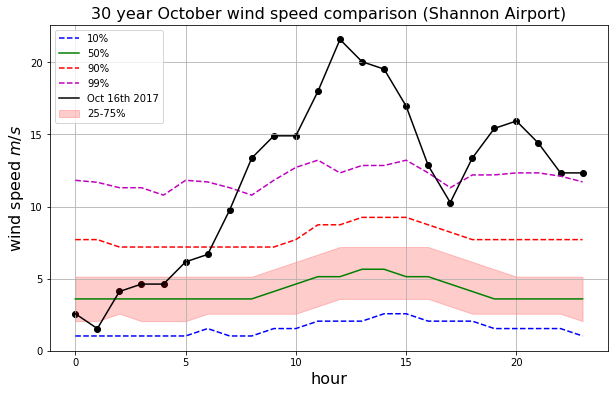

In [35]:
fig = plt.figure(figsize=[10,6])
plt.plot(T10,'b',linestyle='dashed',label='10%')
plt.plot(T50,'g',label='50%')
plt.plot(T90,'r',linestyle='dashed',label='90%')
plt.plot(T99,'m',linestyle='dashed',label='99%')
plt.plot(Oct16,'k',label='Oct 16th 2017')
plt.scatter(range(24),Oct16,color='k')
plt.fill_between(range(24),T25,T75,alpha=0.2,color='red',label='25-75%')
plt.xlabel('hour',fontsize=16)
plt.ylabel('wind speed $m/s$',fontsize=16)
plt.title('30 year October wind speed comparison (Shannon Airport)',fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)

analysing 30 year data

In [36]:
Octobers = dswind[(dswind.index.month==MM)]
Nmean = len(Octobers)
Octobermaxs = Octobers.groupby([Octobers.index.year,Octobers.index.day]).max()
Octobermins = Octobers.groupby([Octobers.index.year,Octobers.index.day]).min()
Nextr = len(Octobermaxs)

In [37]:
mu_30 = dswind.speed.mean()
sigma_30 = dswind.speed.std()
N_30 = len(dswind)
print('Shannon Airport October daily mean avg:', Octobers.speed.mean())
print('Shannon Airport October daily mean std:', Octobers.speed.std())
print('\n')
print('Shannon Airport October daily max avg:', Octobermaxs.speed.mean())
print('Shannon Airport October daily max std:', Octobermaxs.speed.std())
print('\n')
print('Shannon Airport October daily min avg:', Octobermins.speed.mean())
print('Shannon Airport October daily min std:', Octobermins.speed.std())

Shannon Airport October daily mean avg: 4.555181503617563
Shannon Airport October daily mean std: 2.601552644575536


Shannon Airport October daily max avg: 7.365122580645173
Shannon Airport October daily max std: 3.0084418756002678


Shannon Airport October daily min avg: 2.0731333333333257
Shannon Airport October daily min std: 1.4485170329304482


analysing October 16th data

In [38]:
Ophelia = dswind[(dswind.index.year==2017)&(dswind.index.month==10)&(dswind.index.day==16)]
Ophelia

,speed_ind,speed,dir_ind,direction
date,,,,
2017-10-16 00:00:00,2,2.570,2,10.0
2017-10-16 01:00:00,2,1.542,2,10.0
2017-10-16 02:00:00,2,4.112,2,10.0
2017-10-16 03:00:00,2,4.626,2,10.0
2017-10-16 04:00:00,2,4.626,2,40.0
2017-10-16 05:00:00,2,6.168,2,50.0
2017-10-16 06:00:00,2,6.682,2,60.0
2017-10-16 07:00:00,2,9.766,2,80.0
2017-10-16 08:00:00,2,13.364,2,110.0


In [39]:
print('Ophelia mean:', Ophelia.speed.mean())
print('Ophelia max:', Ophelia.speed.max())
print('Ophelia min:', Ophelia.speed.min())

Ophelia mean: 11.929083333333333
Ophelia max: 21.588
Ophelia min: 1.542


In [40]:
print('Mean_z = ', (Ophelia.speed.mean()-Octobers.speed.mean())/Octobers.speed.std())
print('Max_z = ', (Ophelia.speed.max()-Octobermaxs.speed.mean())/Octobermaxs.speed.std())
print('Min_z = ', (Ophelia.speed.min()-Octobermins.speed.mean())/Octobermins.speed.std())

Mean_z =  2.8344234528911025
Max_z =  4.727655712649248
Min_z =  -0.3666738610997255


$\textbf{BELMULLET}$

read data

In [41]:

#Belmullet (West):
dswind = pd.read_csv('hly2375/hly2375.csv',skiprows=24,usecols=[0,11,12,13,14], header=None, skipinitialspace=True, names = ["date","speed_ind","speed","dir_ind","direction"], index_col =0, parse_dates=True)


dswind

,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,34.0,2,230.0
1992-01-01 01:00:00,2,34.0,2,230.0
1992-01-01 02:00:00,2,34.0,2,230.0
1992-01-01 03:00:00,2,31.0,2,240.0
1992-01-01 04:00:00,2,29.0,2,240.0
...,...,...,...,...
2022-02-28 20:00:00,2,7.0,2,270.0
2022-02-28 21:00:00,2,6.0,2,260.0
2022-02-28 22:00:00,2,7.0,2,280.0


filter data and convert speeds to knots

In [42]:
dswind = dswind[(dswind.speed_ind==2)&(dswind.dir_ind==2)&(dswind.speed!=0)&(dswind.index.year>1991)&(dswind.index.year<2022)]
dswind.speed = dswind.speed*(0.514)
dswind

C:\Users\ndoyl\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,17.476,2,230.0
1992-01-01 01:00:00,2,17.476,2,230.0
1992-01-01 02:00:00,2,17.476,2,230.0
1992-01-01 03:00:00,2,15.934,2,240.0
1992-01-01 04:00:00,2,14.906,2,240.0
...,...,...,...,...
2021-12-31 19:00:00,2,9.252,2,180.0
2021-12-31 20:00:00,2,9.766,2,180.0
2021-12-31 21:00:00,2,8.738,2,170.0


Defining angle sections and size

In [43]:
angles = np.arange(10,370,10)
n = np.shape(dswind)[0]
no_angles = len(angles)

extracting wind speed categories

In [44]:
C1 = dswind[dswind.speed <= 2].groupby('direction').count()/n
C2 = dswind[(dswind.speed > 2)&(dswind.speed <= 5)].groupby('direction').count()/n
C3 = dswind[(dswind.speed > 5)&(dswind.speed <= 10)].groupby('direction').count()/n
C4 = dswind[dswind.speed > 10].groupby('direction').count()/n

and frequencies

In [45]:
F1 = np.zeros((no_angles))
F2 = np.zeros((no_angles))
F3 = np.zeros((no_angles))
F4 = np.zeros((no_angles))

for i in range(no_angles):
    j = (i+1)*10
    F1[i] = C1.speed[j]
    F2[i] = C2.speed[j]
    F3[i] = C3.speed[j]
    F4[i] = C4.speed[j]

plotting

Text(0.5, 1.05, 'Windrose (Belmullet)')

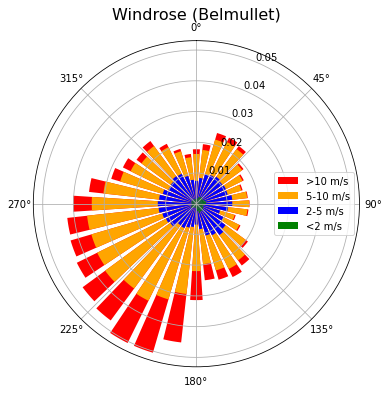

In [46]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.bar(np.radians(angles),F1+F2+F3+F4,width=0.13,color='r',label='>10 m/s')
ax.bar(np.radians(angles),F1+F2+F3,width=0.13,color='orange',label='5-10 m/s')
ax.bar(np.radians(angles),F1+F2,width=0.13,color='b',label='2-5 m/s')
ax.bar(np.radians(angles),F1,width=0.13,color='g',label='<2 m/s')
plt.legend(loc='right')
plt.title('Windrose (Belmullet)',fontsize=16)

Extracting quantiles

In [47]:
MM=10
T10 = np.zeros((24))
T25 = np.zeros((24))
T50 = np.zeros((24))
T75 = np.zeros((24))
T90 = np.zeros((24))
T99 = np.zeros((24))
dates = np.zeros((24))
Oct16 = np.zeros((24))

for HH in range(24):
    T10[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.1)
    T25[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.25)
    T50[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.5)
    T75[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.75)
    T90[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.9)
    T99[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.99)
    Oct16[HH] = dswind[(dswind.index.month==MM)&(dswind.index.year==2017)&(dswind.index.day==16)&(dswind.index.hour==HH)].speed

plotting

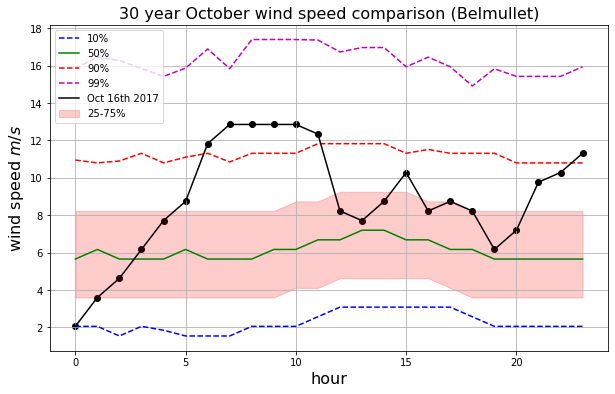

In [48]:
fig = plt.figure(figsize=[10,6])
plt.plot(T10,'b',linestyle='dashed',label='10%')
plt.plot(T50,'g',label='50%')
plt.plot(T90,'r',linestyle='dashed',label='90%')
plt.plot(T99,'m',linestyle='dashed',label='99%')
plt.plot(Oct16,'k',label='Oct 16th 2017')
plt.scatter(range(24),Oct16,color='k')
plt.fill_between(range(24),T25,T75,alpha=0.2,color='red',label='25-75%')
plt.xlabel('hour',fontsize=16)
plt.ylabel('wind speed $m/s$',fontsize=16)
plt.title('30 year October wind speed comparison (Belmullet)',fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)

analysing 30 year data

In [49]:
Octobers = dswind[(dswind.index.month==MM)]
Nmean = len(Octobers)
Octobermaxs = Octobers.groupby([Octobers.index.year,Octobers.index.day]).max()
Octobermins = Octobers.groupby([Octobers.index.year,Octobers.index.day]).min()
Nextr = len(Octobermaxs)

In [50]:
mu_30 = dswind.speed.mean()
sigma_30 = dswind.speed.std()
N_30 = len(dswind)
print('Belmullet October daily mean avg:', Octobers.speed.mean())
print('Belmullet October daily mean std:', Octobers.speed.std())
print('\n')
print('Belmullet October daily max avg:', Octobermaxs.speed.mean())
print('Belmullet October daily max std:', Octobermaxs.speed.std())
print('\n')
print('Belmullet October daily min avg:', Octobermins.speed.mean())
print('Belmullet October daily min std:', Octobermins.speed.std())

Belmullet October daily mean avg: 6.471246278449109
Belmullet October daily mean std: 3.501860362156226


Belmullet October daily max avg: 9.506789247311831
Belmullet October daily max std: 3.7242068057889437


Belmullet October daily min avg: 3.345421505376332
Belmullet October daily min std: 2.44858738493613


analysing October 16th data

In [51]:
Ophelia = dswind[(dswind.index.year==2017)&(dswind.index.month==10)&(dswind.index.day==16)]
Ophelia

,speed_ind,speed,dir_ind,direction
date,,,,
2017-10-16 00:00:00,2,2.056,2,50.0
2017-10-16 01:00:00,2,3.598,2,60.0
2017-10-16 02:00:00,2,4.626,2,40.0
2017-10-16 03:00:00,2,6.168,2,40.0
2017-10-16 04:00:00,2,7.710,2,50.0
2017-10-16 05:00:00,2,8.738,2,60.0
2017-10-16 06:00:00,2,11.822,2,60.0
2017-10-16 07:00:00,2,12.850,2,60.0
2017-10-16 08:00:00,2,12.850,2,60.0


In [52]:
print('Ophelia mean:', Ophelia.speed.mean())
print('Ophelia max:', Ophelia.speed.max())
print('Ophelia min:', Ophelia.speed.min())

Ophelia mean: 8.887916666666664
Ophelia max: 12.85
Ophelia min: 2.056


In [53]:
print('Mean_z = ', (Ophelia.speed.mean()-Octobers.speed.mean())/Octobers.speed.std())
print('Max_z = ', (Ophelia.speed.max()-Octobermaxs.speed.mean())/Octobermaxs.speed.std())
print('Min_z = ', (Ophelia.speed.min()-Octobermins.speed.mean())/Octobermins.speed.std())

Mean_z =  0.6901104379643284
Max_z =  0.8976973962593723
Min_z =  -0.5265981166565414


$\textbf{MALIN HEAD}$

read data

In [54]:

#Malin Head (North):
dswind = pd.read_csv('hly1575/hly1575.csv',skiprows=24,usecols=[0,11,12,13,14], header=None, skipinitialspace=True, names = ["date","speed_ind","speed","dir_ind","direction"], index_col =0, parse_dates=True)


dswind

,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,39.0,2,210.0
1992-01-01 01:00:00,2,42.0,2,220.0
1992-01-01 02:00:00,2,44.0,2,230.0
1992-01-01 03:00:00,2,40.0,2,230.0
1992-01-01 04:00:00,2,36.0,2,240.0
...,...,...,...,...
2022-02-28 20:00:00,2,15.0,2,260.0
2022-02-28 21:00:00,2,11.0,2,230.0
2022-02-28 22:00:00,2,12.0,2,220.0


filter data and convert speeds to knots

In [55]:
dswind = dswind[(dswind.speed_ind==2)&(dswind.dir_ind==2)&(dswind.speed!=0)&(dswind.index.year>1991)&(dswind.index.year<2022)]
dswind.speed = dswind.speed*(0.514)
dswind

C:\Users\ndoyl\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,20.046,2,210.0
1992-01-01 01:00:00,2,21.588,2,220.0
1992-01-01 02:00:00,2,22.616,2,230.0
1992-01-01 03:00:00,2,20.560,2,230.0
1992-01-01 04:00:00,2,18.504,2,240.0
...,...,...,...,...
2021-12-31 19:00:00,2,6.682,2,160.0
2021-12-31 20:00:00,2,8.224,2,160.0
2021-12-31 21:00:00,2,8.738,2,150.0


Defining angle sections and size

In [56]:
angles = np.arange(10,370,10)
n = np.shape(dswind)[0]
no_angles = len(angles)

extracting wind speed categories

In [57]:
C1 = dswind[dswind.speed <= 2].groupby('direction').count()/n
C2 = dswind[(dswind.speed > 2)&(dswind.speed <= 5)].groupby('direction').count()/n
C3 = dswind[(dswind.speed > 5)&(dswind.speed <= 10)].groupby('direction').count()/n
C4 = dswind[dswind.speed > 10].groupby('direction').count()/n

and frequencies

In [58]:
F1 = np.zeros((no_angles))
F2 = np.zeros((no_angles))
F3 = np.zeros((no_angles))
F4 = np.zeros((no_angles))

for i in range(no_angles):
    j = (i+1)*10
    F1[i] = C1.speed[j]
    F2[i] = C2.speed[j]
    F3[i] = C3.speed[j]
    F4[i] = C4.speed[j]

plotting

Text(0.5, 1.05, 'Windrose (Malin Head)')

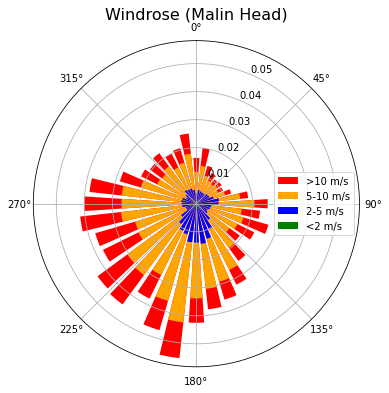

In [59]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.bar(np.radians(angles),F1+F2+F3+F4,width=0.13,color='r',label='>10 m/s')
ax.bar(np.radians(angles),F1+F2+F3,width=0.13,color='orange',label='5-10 m/s')
ax.bar(np.radians(angles),F1+F2,width=0.13,color='b',label='2-5 m/s')
ax.bar(np.radians(angles),F1,width=0.13,color='g',label='<2 m/s')
plt.legend(loc='right')
plt.title('Windrose (Malin Head)',fontsize=16)

Extracting quantiles

In [60]:
MM=10
T10 = np.zeros((24))
T25 = np.zeros((24))
T50 = np.zeros((24))
T75 = np.zeros((24))
T90 = np.zeros((24))
T99 = np.zeros((24))
dates = np.zeros((24))
Oct16 = np.zeros((24))

for HH in range(24):
    T10[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.1)
    T25[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.25)
    T50[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.5)
    T75[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.75)
    T90[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.9)
    T99[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.99)
    Oct16[HH] = dswind[(dswind.index.month==MM)&(dswind.index.year==2017)&(dswind.index.day==16)&(dswind.index.hour==HH)].speed

plotting

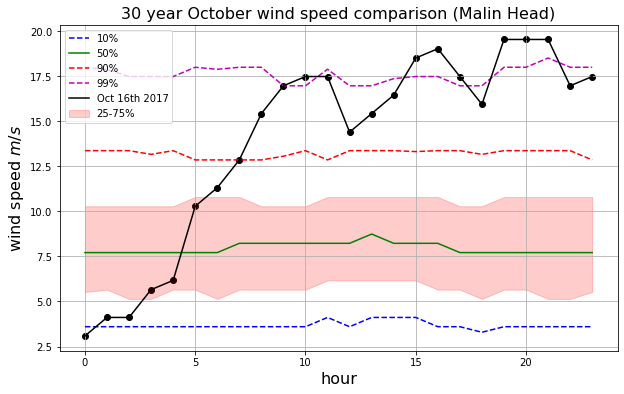

In [61]:
fig = plt.figure(figsize=[10,6])
plt.plot(T10,'b',linestyle='dashed',label='10%')
plt.plot(T50,'g',label='50%')
plt.plot(T90,'r',linestyle='dashed',label='90%')
plt.plot(T99,'m',linestyle='dashed',label='99%')
plt.plot(Oct16,'k',label='Oct 16th 2017')
plt.scatter(range(24),Oct16,color='k')
plt.fill_between(range(24),T25,T75,alpha=0.2,color='red',label='25-75%')
plt.xlabel('hour',fontsize=16)
plt.ylabel('wind speed $m/s$',fontsize=16)
plt.title('30 year October wind speed comparison (Malin Head)',fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)

analysing 30 year data

In [62]:
Octobers = dswind[(dswind.index.month==MM)]
Nmean = len(Octobers)
Octobermaxs = Octobers.groupby([Octobers.index.year,Octobers.index.day]).max()
Octobermins = Octobers.groupby([Octobers.index.year,Octobers.index.day]).min()
Nextr = len(Octobermaxs)

In [63]:
mu_30 = dswind.speed.mean()
sigma_30 = dswind.speed.std()
N_30 = len(dswind)
print('Malin Head October daily mean avg:', Octobers.speed.mean())
print('Malin Head October daily mean std:', Octobers.speed.std())
print('\n')
print('Malin Head October daily max avg:', Octobermaxs.speed.mean())
print('Malin Head October daily max std:', Octobermaxs.speed.std())
print('\n')
print('Malin Head October daily min avg:', Octobermins.speed.mean())
print('Malin Head October daily min std:', Octobermins.speed.std())

Malin Head October daily mean avg: 8.241799260528515
Malin Head October daily mean std: 3.6935237877904945


Malin Head October daily max avg: 11.749597849462363
Malin Head October daily max std: 3.7016139786487114


Malin Head October daily min avg: 4.636501075268813
Malin Head October daily min std: 2.812596144224181


analysing October 16th data

In [64]:
Ophelia = dswind[(dswind.index.year==2017)&(dswind.index.month==10)&(dswind.index.day==16)]
Ophelia

,speed_ind,speed,dir_ind,direction
date,,,,
2017-10-16 00:00:00,2,3.084,2,30.0
2017-10-16 01:00:00,2,4.112,2,30.0
2017-10-16 02:00:00,2,4.112,2,10.0
2017-10-16 03:00:00,2,5.654,2,20.0
2017-10-16 04:00:00,2,6.168,2,40.0
2017-10-16 05:00:00,2,10.280,2,30.0
2017-10-16 06:00:00,2,11.308,2,40.0
2017-10-16 07:00:00,2,12.850,2,50.0
2017-10-16 08:00:00,2,15.420,2,50.0


In [65]:
print('Ophelia mean:', Ophelia.speed.mean())
print('Ophelia max:', Ophelia.speed.max())
print('Ophelia min:', Ophelia.speed.min())

Ophelia mean: 13.963666666666663
Ophelia max: 19.532
Ophelia min: 3.084


In [66]:
print('Mean_z = ', (Ophelia.speed.mean()-Octobers.speed.mean())/Octobers.speed.std())
print('Max_z = ', (Ophelia.speed.max()-Octobermaxs.speed.mean())/Octobermaxs.speed.std())
print('Min_z = ', (Ophelia.speed.min()-Octobermins.speed.mean())/Octobermins.speed.std())

Mean_z =  1.5491621916860676
Max_z =  2.1024348285443404
Min_z =  -0.5519815130433705


$\textbf{VALENTIA OBSERVATORY}$

read data

In [67]:

#Valentia Observatory:
dswind = pd.read_csv('hly2275/hly2275.csv',skiprows=24,usecols=[0,11,12,13,14], header=None, skipinitialspace=True, names = ["date","speed_ind","speed","dir_ind","direction"], index_col =0, parse_dates=True)


dswind

,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,17.0,2,230.0
1992-01-01 01:00:00,2,15.0,2,230.0
1992-01-01 02:00:00,2,15.0,2,230.0
1992-01-01 03:00:00,2,18.0,2,230.0
1992-01-01 04:00:00,2,19.0,2,240.0
...,...,...,...,...
2022-02-28 20:00:00,2,5.0,2,20.0
2022-02-28 21:00:00,2,3.0,2,50.0
2022-02-28 22:00:00,2,3.0,2,50.0


filter data and convert speeds to knots

In [68]:
dswind = dswind[(dswind.speed_ind==2)&(dswind.dir_ind==2)&(dswind.speed!=0)&(dswind.index.year>1991)&(dswind.index.year<2022)]
dswind.speed = dswind.speed*(0.514)
dswind

C:\Users\ndoyl\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,speed_ind,speed,dir_ind,direction
date,,,,
1992-01-01 00:00:00,2,8.738,2,230.0
1992-01-01 01:00:00,2,7.710,2,230.0
1992-01-01 02:00:00,2,7.710,2,230.0
1992-01-01 03:00:00,2,9.252,2,230.0
1992-01-01 04:00:00,2,9.766,2,240.0
...,...,...,...,...
2021-12-31 19:00:00,2,9.252,2,170.0
2021-12-31 20:00:00,2,9.252,2,170.0
2021-12-31 21:00:00,2,8.738,2,160.0


Defining angle sections and size

In [69]:
angles = np.arange(10,370,10)
n = np.shape(dswind)[0]
no_angles = len(angles)

extracting wind speed categories

In [70]:
C1 = dswind[dswind.speed <= 2].groupby('direction').count()/n
C2 = dswind[(dswind.speed > 2)&(dswind.speed <= 5)].groupby('direction').count()/n
C3 = dswind[(dswind.speed > 5)&(dswind.speed <= 10)].groupby('direction').count()/n
C4 = dswind[dswind.speed > 10].groupby('direction').count()/n

and frequencies

In [71]:
F1 = np.zeros((no_angles))
F2 = np.zeros((no_angles))
F3 = np.zeros((no_angles))
F4 = np.zeros((no_angles))

for i in range(no_angles):
    j = (i+1)*10
    F1[i] = C1.speed[j]
    F2[i] = C2.speed[j]
    F3[i] = C3.speed[j]
    F4[i] = C4.speed[j]

plotting

Text(0.5, 1.05, 'Windrose (Valentia Observatory)')

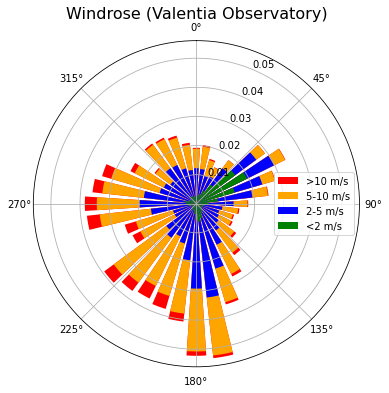

In [72]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.bar(np.radians(angles),F1+F2+F3+F4,width=0.13,color='r',label='>10 m/s')
ax.bar(np.radians(angles),F1+F2+F3,width=0.13,color='orange',label='5-10 m/s')
ax.bar(np.radians(angles),F1+F2,width=0.13,color='b',label='2-5 m/s')
ax.bar(np.radians(angles),F1,width=0.13,color='g',label='<2 m/s')
plt.legend(loc='right')
plt.title('Windrose (Valentia Observatory)',fontsize=16)

Extracting quantiles

In [73]:
MM=10
T10 = np.zeros((24))
T25 = np.zeros((24))
T50 = np.zeros((24))
T75 = np.zeros((24))
T90 = np.zeros((24))
T99 = np.zeros((24))
dates = np.zeros((24))
Oct16 = np.zeros((24))

for HH in range(24):
    T10[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.1)
    T25[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.25)
    T50[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.5)
    T75[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.75)
    T90[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.9)
    T99[HH]= dswind.speed[(dswind.index.month==MM)&(dswind.index.hour==HH)].quantile(q=0.99)
    Oct16[HH] = dswind[(dswind.index.month==MM)&(dswind.index.year==2017)&(dswind.index.day==16)&(dswind.index.hour==HH)].speed

plotting

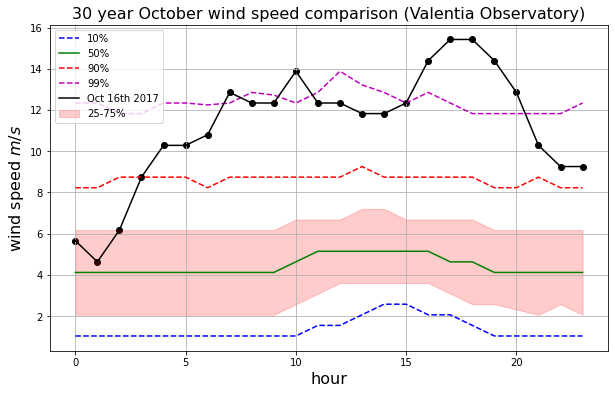

In [74]:
fig = plt.figure(figsize=[10,6])
plt.plot(T10,'b',linestyle='dashed',label='10%')
plt.plot(T50,'g',label='50%')
plt.plot(T90,'r',linestyle='dashed',label='90%')
plt.plot(T99,'m',linestyle='dashed',label='99%')
plt.plot(Oct16,'k',label='Oct 16th 2017')
plt.scatter(range(24),Oct16,color='k')
plt.fill_between(range(24),T25,T75,alpha=0.2,color='red',label='25-75%')
plt.xlabel('hour',fontsize=16)
plt.ylabel('wind speed $m/s$',fontsize=16)
plt.title('30 year October wind speed comparison (Valentia Observatory)',fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)

analysing 30 year data

In [75]:
Octobers = dswind[(dswind.index.month==MM)]
Nmean = len(Octobers)
Octobermaxs = Octobers.groupby([Octobers.index.year,Octobers.index.day]).max()
Octobermins = Octobers.groupby([Octobers.index.year,Octobers.index.day]).min()
Nextr = len(Octobermaxs)

In [76]:
mu_30 = dswind.speed.mean()
sigma_30 = dswind.speed.std()
N_30 = len(dswind)
print('Valentia Observatory October daily mean avg:', Octobers.speed.mean())
print('Valentia Observatory October daily mean std:', Octobers.speed.std())
print('\n')
print('Valentia Observatory October daily max avg:', Octobermaxs.speed.mean())
print('Valentia Observatory October daily max std:', Octobermaxs.speed.std())
print('\n')
print('Valentia Observatory October daily min avg:', Octobermins.speed.mean())
print('Valentia Observatory October daily min std:', Octobermins.speed.std())

Valentia Observatory October daily mean avg: 4.781389417655407
Valentia Observatory October daily mean std: 2.8416746196800973


Valentia Observatory October daily max avg: 7.4999784946236705
Valentia Observatory October daily max std: 2.9572155785482557


Valentia Observatory October daily min avg: 2.1704064516128936
Valentia Observatory October daily min std: 1.8286857770001086


analysing October 16th data

In [77]:
Ophelia = dswind[(dswind.index.year==2017)&(dswind.index.month==10)&(dswind.index.day==16)]
Ophelia

,speed_ind,speed,dir_ind,direction
date,,,,
2017-10-16 00:00:00,2,5.654,2,90.0
2017-10-16 01:00:00,2,4.626,2,80.0
2017-10-16 02:00:00,2,6.168,2,80.0
2017-10-16 03:00:00,2,8.738,2,80.0
2017-10-16 04:00:00,2,10.280,2,80.0
2017-10-16 05:00:00,2,10.280,2,90.0
2017-10-16 06:00:00,2,10.794,2,130.0
2017-10-16 07:00:00,2,12.850,2,130.0
2017-10-16 08:00:00,2,12.336,2,130.0


In [78]:
print('Ophelia mean:', Ophelia.speed.mean())
print('Ophelia max:', Ophelia.speed.max())
print('Ophelia min:', Ophelia.speed.min())

Ophelia mean: 11.243749999999999
Ophelia max: 15.42
Ophelia min: 4.626


In [79]:
print('Mean_z = ', (Ophelia.speed.mean()-Octobers.speed.mean())/Octobers.speed.std())
print('Max_z = ', (Ophelia.speed.max()-Octobermaxs.speed.mean())/Octobermaxs.speed.std())
print('Min_z = ', (Ophelia.speed.min()-Octobermins.speed.mean())/Octobermins.speed.std())

Mean_z =  2.2741381217924572
Max_z =  2.678202280154494
Min_z =  1.3428187495477857
